<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01c_challenges_and_extra_curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises / extra curriculum Section 3

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [71]:
import math
import tensorflow as tf

y = list(map(lambda val: (val**2 - 5*val) / 768, range(1, 10000)))
X = list(range(1, 10000))

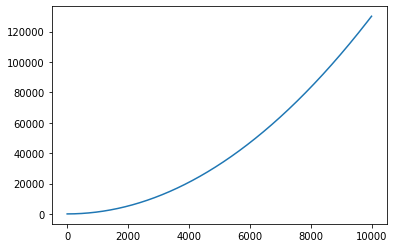

In [72]:
import matplotlib.pyplot as plt
plt.plot(X, y)


In [77]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_train = tf.constant(y_train)
X_train = tf.constant(X_train)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [99]:
model_1 = tf.keras.models.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="model_1")

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"],
                loss="mae")

history_1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10, verbose=0)


In [100]:
model_1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 12452.3691 - mae: 12452.3691


[12452.369140625, 12452.369140625]

In [101]:
y_pred = model_1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


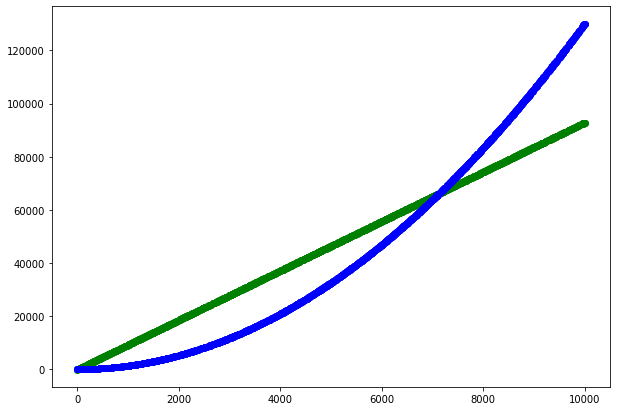

In [102]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_pred, c="g")
plt.scatter(X_test, y_test, c="b")

Seems like there is no good linear solution to a set where the dependent variable is the result of an exponential equation of the independent variable.

## 2. Try and improve the results we got on the insurance dataset, some things you might want to try include:

- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
- What happens if you train for longer (say 300 epochs instead of 200)?
